# Unit Testing for Algorithms 

## Simple sanity checks for fitting and smoothing algorithms I used for this project


In [1]:
# Setup
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append("src")
#import algorithms
from sinefit import sinfit     
from peakfinder import peakfinder
from smoothing import smoothTriangle

## Peakfinder Algorithm:

### Verdict: it works

Amplitude=0.9922861012090539, Angular freq.=2.0318017905303987, phase=0.3257125574534292, offset=3.9802085071816347, Max. Cov.=0.014412243419908165


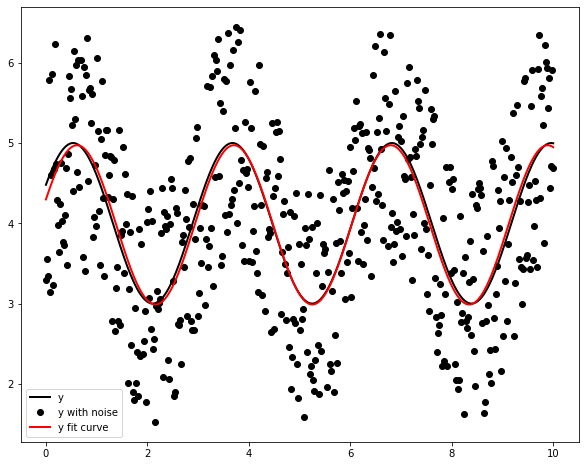

In [2]:
N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
tt = np.linspace(0, 10, N)
tt2 = np.linspace(0, 10, 10*N)
yy = amp*np.sin(omega*tt + phase) + offset
yynoise = yy + noise*(np.random.random(len(tt))-0.5)

res = sinfit(tt, yynoise)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )
plt.rcParams["figure.figsize"]=10,8 
plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="y with noise")
plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

## Peak Finder Algorithm:

### Verdict: it works for sufficiently smoothed data sets

In [3]:
peakwidth = 2
peaks, indx = peakfinder(yy, tt, peakwidth)
        
print(peaks, indx)

[4.999935384962691, 4.999813523421052, 4.999950872246836, 4.999999868636526] [27, 183, 340, 497]
